In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
data = pd.read_csv('ratio_values', header=None, names=['valeur'])


Text(0, 0.5, 'Fréquence')

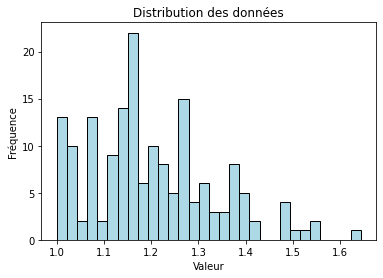

In [ ]:
plt.hist(data['valeur'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution des données')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

Text(0, 0.5, 'Fréquence')

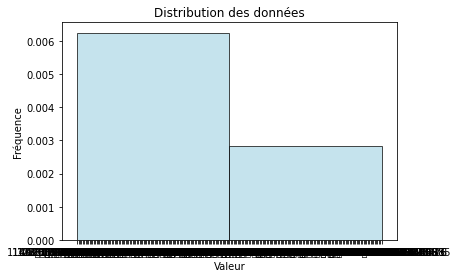

In [52]:
plt.hist(data['valeur'], bins=2, color='lightblue', edgecolor='black', alpha=0.7, density=True)

plt.title('Distribution des données')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

In [2]:
from ete3 import NCBITaxa
import pandas as pd

ncbi = NCBITaxa()

In [18]:
tenta_df = []
with open('ratio_values', 'r+') as reader:
    for line in reader.readlines():
        line = line.strip()
        if line.startswith('>') == True:
            taxid = line.lstrip('>')
            lineage = ncbi.get_lineage(taxid)
            taxonomy = ncbi.get_taxid_translator(lineage)
            species = ncbi.get_taxid_translator([taxid])[int(taxid)]
            superorder = taxonomy[lineage[18]]
        elif line.startswith('<') == True:
            krab = int(line.split('\t')[1])
            ssxrd = int(line.split('\t')[2])
            zf = int(line.split('\t')[3])
        else:
            tenta_df.append([taxid, species, superorder, line, krab, ssxrd, zf])


In [20]:
plot_df = pd.DataFrame(tenta_df, columns=['Taxid', 'Species name', 'Superorder', 'Ratio', 'KRAB', 'SSXRD', 'ZF'])
pd.set_option("display.max_rows", None)
plot_df.to_csv('plotdata.csv', sep=';')

In [21]:
plot_df

Taxid                    Species name     Superorder  \
0     345717             Pieris macdunnoughi  Endopterygota   
1    2961670          Neodiprion virginianus  Endopterygota   
2    1163346            Diorhabda sublineata  Endopterygota   
3      66420                  Papilio xuthus  Endopterygota   
4      50390  Diabrotica virgifera virgifera  Endopterygota   
5      50390  Diabrotica virgifera virgifera  Endopterygota   
6      50390  Diabrotica virgifera virgifera  Endopterygota   
7    1035111     Leguminivora glycinivorella  Endopterygota   
8    1035111     Leguminivora glycinivorella  Endopterygota   
9    1035111     Leguminivora glycinivorella  Endopterygota   
10      6984             Diploptera punctata   Polyneoptera   
11     78633                     Pieris napi  Endopterygota   
12    224129             Agrilus planipennis  Endopterygota   
13    224129             Agrilus planipennis  Endopterygota   
14    224129             Agrilus planipennis  Endopterygota   
15    680683            Amyelois transitella  Endopterygota   
16    680683            Amyelois transitella  Endopterygota   
17    116150                 Pararge aegeria  Endopterygota   
18    116150                 Pararge aegeria  Endopterygota   
19      7038                  Bemisia tabaci   Paraneoptera   
20      7038                  Bemisia tabaci   Paraneoptera   
21      7038                  Bemisia tabaci   Paraneoptera   
22     30207               Polistes fuscatus  Endopterygota   
23     30207               Polistes fuscatus  Endopterygota   
24     30207               Polistes fuscatus  Endopterygota   
25    115357               Harmonia axyridis  Endopterygota   
26      7224                Drosophila hydei  Endopterygota   
27     91411             Polistes canadensis  Endopterygota   
28     63699      Gonioctena quinquepunctata  Endopterygota   
29     63699      Gonioctena quinquepunctata  Endopterygota   
30     63699      Gonioctena quinquepunctata  Endopterygota   
31     63699      Gonioctena quinquepunctata  Endopterygota   
32     91739                  Aricia agestis  Endopterygota   
33    200917        Acanthoscelides obtectus  Endopterygota   
34    185578                  Anopheles nili  Endopterygota   
35     72248                  Colias croceus  Endopterygota   
36     72248                  Colias croceus  Endopterygota   
37     72248                  Colias croceus  Endopterygota   
38     72248                  Colias croceus  Endopterygota   
39   1431903           Brassicogethes aeneus  Endopterygota   
40   1431903           Brassicogethes aeneus  Endopterygota   
41   1431903           Brassicogethes aeneus  Endopterygota   
42    189913                Leptidea sinapis  Endopterygota   
43    189913                Leptidea sinapis  Endopterygota   
44    189913                Leptidea sinapis  Endopterygota   
45    197161                Ischnura elegans        Odonata   
46    197161                Ischnura elegans        Odonata   
47    197161                Ischnura elegans        Odonata   
48    197161                Ischnura elegans        Odonata   
49    197161                Ischnura elegans        Odonata   
50      7445                    Vespa crabro  Endopterygota   
51    136037         Zootermopsis nevadensis   Polyneoptera   
52    136037         Zootermopsis nevadensis   Polyneoptera   
53    136037         Zootermopsis nevadensis   Polyneoptera   
54    136037         Zootermopsis nevadensis   Polyneoptera   
55    136037         Zootermopsis nevadensis   Polyneoptera   
56    136037         Zootermopsis nevadensis   Polyneoptera   
57    688607                Achroia grisella  Endopterygota   
58    688607                Achroia grisella  Endopterygota   
59      7108           Spodoptera frugiperda  Endopterygota   
60      7108           Spodoptera frugiperda  Endopterygota   
61      7141        Choristoneura fumiferana  Endopterygota   
62      7141        Choristoneura fumi

In [9]:
with open('ratio_values', 'r+') as reader:
    data = []
    for line in reader.readlines():
        line = line.strip()
        if line.startswith('>') == True:
            taxid = line.lstrip('>')
            lineage = ncbi.get_lineage(taxid)
            taxonomy = ncbi.get_taxid_translator(lineage)
            data.append([taxid]+[taxonomy[k] for k in lineage])
columns = ['Taxid']+ [str(i) for i in range(max([len(data[j]) for j in range(len(data))])-1)]
print(len(columns))

36


In [10]:
sorted_tax = pd.DataFrame(data, columns=columns)
sorted_tax.columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [12]:
sorted_tax = sorted_tax.sort_values(by=columns)
# sorted_tax
sorted_tax.to_csv('sorted_taxonomy.csv', sep= ';')


In [11]:
import pandas as pd

df = pd.read_csv('results/GCF_000696155.1/summary_table_GCF_000696155.1.csv', sep=';')
accession = 'GCF_000696155.1'   
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [12]:
df

Unnamed: 0           SeqID                      SET Query   SET E-value  \
0            0  XP_021927981.1  Domain_SET_ReferenceAlignment  1.200000e-64   
1            1  XP_021927982.1  Domain_SET_ReferenceAlignment  1.200000e-64   
2            2  XP_021927984.1  Domain_SET_ReferenceAlignment  1.200000e-64   
3            3  XP_021927980.1  Domain_SET_ReferenceAlignment  1.400000e-64   
4            4  XP_021927666.1  Domain_SET_ReferenceAlignment  2.800000e-62   
5            5  XP_021927665.1  Domain_SET_ReferenceAlignment  2.900000e-62   
6            6  XP_021933981.1  Domain_SET_ReferenceAlignment  3.100000e-32   
7            7  XP_021933982.1  Domain_SET_ReferenceAlignment  3.100000e-32   
8            8  XP_021933983.1  Domain_SET_ReferenceAlignment  3.100000e-32   
9            9  XP_021933984.1  Domain_SET_ReferenceAlignment  3.100000e-32   
10          10  XP_021933985.1  Domain_SET_ReferenceAlignment  3.100000e-32   
11          11  XP_021933986.1  Domain_SET_ReferenceAlignment  3.100000e-32   
12          12  XP_021933980.1  Domain_SET_ReferenceAlignment  3.400000e-32   
13          13  XP_021914075.1  Domain_SET_ReferenceAlignment  2.100000e-27   
14          14  XP_021939677.1  Domain_SET_ReferenceAlignment  2.800000e-22   
15          15  XP_021917414.1  Domain_SET_ReferenceAlignment  1.600000e-21   
16          16  XP_021923508.1  Domain_SET_ReferenceAlignment  8.700000e-14   
17          17  XP_021923509.1  Domain_SET_ReferenceAlignment  6.700000e-14   
18          18  XP_021923866.1  Domain_SET_ReferenceAlignment  8.100000e-12   
19          19  XP_021923864.1  Domain_SET_ReferenceAlignment  8.100000e-12   
20          20  XP_021923865.1  Domain_SET_ReferenceAlignment  8.000000e-12   
21          21  XP_021939980.1  Domain_SET_ReferenceAlignment  8.500000e-09   
22          22  XP_021939987.1  Domain_SET_ReferenceAlignment  8.600000e-08   

    SET Score  Nb SET domains  SET domain start  SET domain end  \
0       218.0               1               130             291   
1       218.0               1               130             291   
2       218.0               1               130             291   
3       217.8               1               183             344   
4       210.3               1                70             231   
5       210.2               1                80             241   
6       112.6               1                32             193   
7       112.6               1                32             193   
8       112.6               1                31             192   
9       112.6               1                31             192   
10      112.6               1                31             192   
11      112.6               1                31             192   
12      112.5               1                78             239   
13       96.9               1                 9             180   
14       80.2               1                24             189   
15       77.8               1               578             744   
16       52.6               1               505             626   
17       53.0               1               245             366   
18       46.2               1                44             143   
19       46.2               1                54             153   
20       46.2               1                54             153   
21       36.4               1                33             148   
22       33.1               1                 4             109   

                        KRAB Query  KRAB E-value  KRAB Score  Nb KRAB domains  \
0                                0  0.000000e+00         0.0                0   
1                                0  0.000000e+00         0.0                0   
2                                0  0.000000e+00         0.0                0   
3   Domain_KRAB_ReferenceAlignment  1.000000e-18        67.9                1   
4                                0  0.000000e+00         0.0                0   
5           

In [35]:
taxonomy = pd.read_csv('sorted_taxonomy.csv', sep=',')
with open('data/resources/organisms_data') as reader:
    dico = {}
    for line in reader.readlines()[1:]:
        taxid = int(line.split('\t')[1])
        assembly = line.split('\t')[2]
        dico[taxid] = assembly


for index, row in df.iterrows():
    df.at[index, 'Accession'] = dico[row['Taxid']]
taxonomy.to_csv('sorted_taxonomy.csv', sep=';')